# Pandas

**Bài toán:**
* Người ta lắp đặt thiết bị để đếm số lượng xe đạp đi qua chiều phía đông và phía tây của cây cầu Fremont Bridge theo từng giờ.
* Chi tiết: https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k
----------------------
**Tập dữ liệu:**
* Tập dữ liệu là số lượng xe đạp đi qua cây cầu Fremont Bridge. Dữ liệu này được thu thập tự động thông qua các cảm biến ở 2 lối đi bộ ở phía đông và phía tây của cây cầu. Số lượng xe đạp được tổng hợp theo từng giờ.
* Tập dữ liệu bao gồm 4 cột:
    - Date: Thời gian (ngày - giờ): 10/03/2012 12:00:00 AM (Kiểu thời gian)
    - Fremont Bridge Total: Tổng số xe đi theo cả 2 lối đông và tây (Kiểu số nguyên)
    - Fremont Bridge East Sidewalk: Số xe đạp đi qua lối phía đông của cầu tương ứng với thời gian (Kiểu số nguyên)
    - Fremont Bridge West Sidewalk: Số xe đạp đi qua lối phía tây của cầu tương ứng với thời gian (Kiểu số nguyên)

### 1) Đọc, quan sát và chuẩn hóa dữ liệu
Đọc file dữ liệu "Data_Bicycle_Counter.csv" và thực hiện các yêu cầu sau:

1.1 Kiểm tra dữ liệu missing

1.2 Liệt kê các thời điểm không có dữ liệu (Missing values)

1.3 Chuyển đổi dữ liệu cột Date về dạng chuỗi thời gian

1.4 Thiết lập cột Date làm index cho DataFrame ()

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
df = pd.read_csv('Data_Bicycle_Counter.csv')
df.head(10)

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0
5,10/03/2012 05:00:00 AM,31.0,21.0,10.0
6,10/03/2012 06:00:00 AM,155.0,105.0,50.0
7,10/03/2012 07:00:00 AM,352.0,257.0,95.0
8,10/03/2012 08:00:00 AM,437.0,291.0,146.0
9,10/03/2012 09:00:00 AM,276.0,172.0,104.0


In [54]:
# kiểm tra dữ liệu missing bằng isnull() và sum()
df.isnull().sum()


Date                             0
Fremont Bridge Total            21
Fremont Bridge East Sidewalk    21
Fremont Bridge West Sidewalk    21
dtype: int64

In [55]:
# Liệt kê các thời điểm không có dữ liệu (Missing values)
df[df.isnull().any(axis=1)]


,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
6105,06/14/2013 09:00:00 AM,NaN,NaN,NaN
6106,06/14/2013 10:00:00 AM,NaN,NaN,NaN
12530,03/09/2014 02:00:00 AM,NaN,NaN,NaN
21266,03/08/2015 02:00:00 AM,NaN,NaN,NaN
22331,04/21/2015 11:00:00 AM,NaN,NaN,NaN
22332,04/21/2015 12:00:00 PM,NaN,NaN,NaN
30170,03/13/2016 02:00:00 AM,NaN,NaN,NaN
38906,03/12/2017 02:00:00 AM,NaN,NaN,NaN
47642,03/11/2018 02:00:00 AM,NaN,NaN,NaN
56378,03/10/2019 02:00:00 AM,NaN,NaN,NaN


In [56]:
# đổi thành tên ngắn gọn
df.columns = ['Date', 'Total', 'East', 'West']
df.head(10)

,Date,Total,East,West
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0
5,10/03/2012 05:00:00 AM,31.0,21.0,10.0
6,10/03/2012 06:00:00 AM,155.0,105.0,50.0
7,10/03/2012 07:00:00 AM,352.0,257.0,95.0
8,10/03/2012 08:00:00 AM,437.0,291.0,146.0
9,10/03/2012 09:00:00 AM,276.0,172.0,104.0


In [57]:
#Chuyển đổi dữ liệu cột Date về dạng chuỗi thời gian bằng hàm to_datetime()
df['Date'] = pd.to_datetime(df['Date'])
df.head(10)

,Date,Total,East,West
0,2012-10-03 00:00:00,13.0,4.0,9.0
1,2012-10-03 01:00:00,10.0,4.0,6.0
2,2012-10-03 02:00:00,2.0,1.0,1.0
3,2012-10-03 03:00:00,5.0,2.0,3.0
4,2012-10-03 04:00:00,7.0,6.0,1.0
5,2012-10-03 05:00:00,31.0,21.0,10.0
6,2012-10-03 06:00:00,155.0,105.0,50.0
7,2012-10-03 07:00:00,352.0,257.0,95.0
8,2012-10-03 08:00:00,437.0,291.0,146.0
9,2012-10-03 09:00:00,276.0,172.0,104.0


In [58]:
#Thiết lập cột Date làm index cho DataFrame bằng hàm set_index
df.set_index('Date', inplace=True)
df.head(10)


,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
2012-10-03 05:00:00,31.0,21.0,10.0
2012-10-03 06:00:00,155.0,105.0,50.0
2012-10-03 07:00:00,352.0,257.0,95.0
2012-10-03 08:00:00,437.0,291.0,146.0


### 2) Khám phá tập dữ liệu
Sử dụng các đặc trưng thống kê

In [60]:
#Sử dụng sum tính tổng lượt người đi xe đạp
tong = df['Total'].sum()
print('Tổng lượt người đi xe đạp: ')
print(tong)

Tổng lượt người đi xe đạp: 
15341827.0


In [37]:
df.head(10)

,Total,East,West
Date,,,
10/03/2012 12:00:00 AM,13.0,4.0,9.0
10/03/2012 01:00:00 AM,10.0,4.0,6.0
10/03/2012 02:00:00 AM,2.0,1.0,1.0
10/03/2012 03:00:00 AM,5.0,2.0,3.0
10/03/2012 04:00:00 AM,7.0,6.0,1.0
10/03/2012 05:00:00 AM,31.0,21.0,10.0
10/03/2012 06:00:00 AM,155.0,105.0,50.0
10/03/2012 07:00:00 AM,352.0,257.0,95.0
10/03/2012 08:00:00 AM,437.0,291.0,146.0


Số lượng xe đạp qua cầu phía West: 
135593


<BarContainer object of 9 artists>

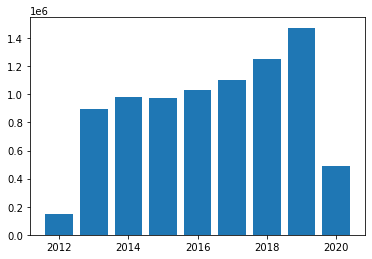

In [64]:
#Thống kê số lượng xe đạp qua cầu phía West
tong1 = df['West'].count()
print('Số lượng xe đạp qua cầu phía West: ')
print(tong1)
#Trực quan hóa số liệu thống kê (lựa chọn biểu đồ thích hợp để trực quan hóa dữ liệu trên:

# group by the year _ date and tong 	Fremont Bridge West Sidewalk

# lay ra nam_year
nam = df.index.year
# group by year va tong so luong xe di qua west
tk_nam = df.groupby(nam)['West'].sum()
tk_nam

plt.bar(tk_nam.index, tk_nam.values)


Nhận xét:
- 
-
-

### 3) Thống kê tổng số lượng đi xe đạp theo năm để thấy xu hướng chung và rút ra kết luận (tối thiểu 2 kết luận)

In [9]:
#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp


Nhận xét:
-
-
-

### 3) Thống kê tổng số lượng đi xe đạp theo năm để thấy xu hướng chung và rút ra kết luận (tối thiểu 2 kết luận)

In [75]:
#Dữ liệu bắt đầu từ 3/10/2012 --> 31/08/2020
#Tách dữ liệu chỉ lấy từ năm 2013 - 2019

df1 = df.loc['2013':'2019']
df1.head(10)

,Total,East,West
Date,,,
2013-01-01 00:00:00,7.0,2.0,5.0
2013-01-01 01:00:00,21.0,9.0,12.0
2013-01-01 02:00:00,16.0,8.0,8.0
2013-01-01 03:00:00,6.0,2.0,4.0
2013-01-01 04:00:00,4.0,2.0,2.0
2013-01-01 05:00:00,3.0,1.0,2.0
2013-01-01 06:00:00,7.0,6.0,1.0
2013-01-01 07:00:00,3.0,1.0,2.0
2013-01-01 08:00:00,11.0,7.0,4.0


In [91]:
#Tổng hợp số liệu chuỗi thời gian theo từng năm
nam = df1.index.year
tk_nam = df1.groupby(nam).sum()
tk_nam
#Tính tổng số lượt qua cầu theo năm

,Total,East,West
Date,,,
2013,1856558.0,957982.0,898576.0
2014,2012392.0,1030652.0,981740.0
2015,1973112.0,1001830.0,971282.0
2016,1964940.0,936608.0,1028332.0
2017,1926270.0,825010.0,1101260.0
2018,2103760.0,851310.0,1252450.0
2019,2374292.0,899708.0,1474584.0


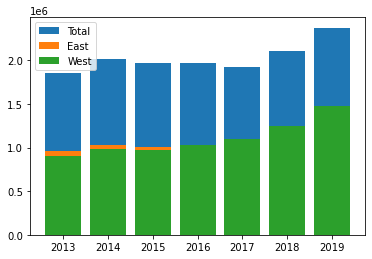

In [98]:
#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp

plt.bar(tk_nam.index, tk_nam['Total'], label='Total')
plt.bar(tk_nam.index, tk_nam['East'], label='East')
plt.bar(tk_nam.index, tk_nam['West'], label='West')
plt.legend()


### 4) Thống kê số lượng người đi xe đạp theo tháng để thấy xu hướng mùa vụ và rút ra kết luận (tối thiểu 2 kết luận)

In [66]:
#Thống kê số lượng xe theo tháng qua phía Đông, Tây và Toàn bộ
thang = df.index.month
tk_thang_Total = df.groupby(thang)['Total'].sum()  	
tk_thang_East= df.groupby(thang)['East'].sum() 
tk_thang_West = df.groupby(thang)['West'].sum()  	

tk_thang_Total


Date
1      914770.0
2      834652.0
3     1090500.0
4     1275712.0
5     1707022.0
6     1645745.0
7     1771661.0
8     1702713.0
9     1336996.0
10    1333480.0
11     997500.0
12     731076.0
Name: Total, dtype: float64

In [67]:
tk_thang_East

Date
1     421144.0
2     380628.0
3     499493.0
4     602300.0
5     801964.0
6     754783.0
7     804846.0
8     754491.0
9     604028.0
10    606398.0
11    441682.0
12    325576.0
Name: East, dtype: float64

In [10]:
#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp


In [11]:
#Hiển thị chi tiết dữ liệu theo tháng của một năm cụ thể [2019].


#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp


Nhận xét:
-
-
-

### 5) Thống kê lượng đi xe đạp theo giờ và rút ra kết luận (tối thiểu 2 kết luận)

In [12]:
#Trực quan hóa dữ liệu:


Nhận xét:
-
-
-


### 6) Thống kê lượng xe trung bình theo ngày trong tuần và rút ra kết luận (tối thiểu 2 kết luận)

In [13]:
#Trực quan hóa dữ liệu


Nhận xét:
-
-
-